angles:  (8036, 4)
angles:  (8036, 4)


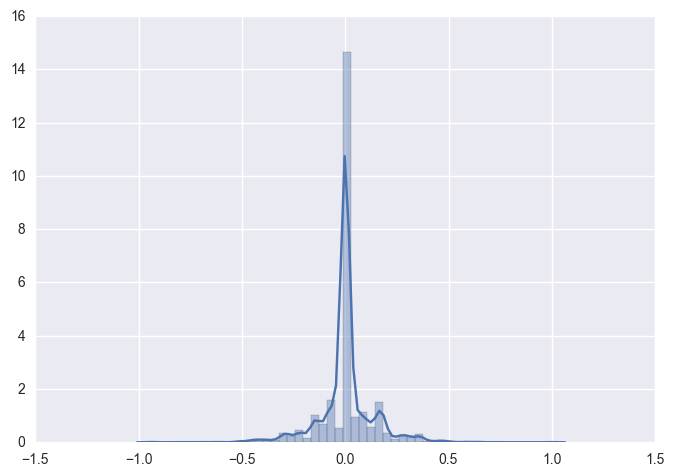

In [5]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

data = "./data/"
log = "driving_log.csv"


data = pd.read_csv(data + log)
angles = data[["center", "left", "right", "steering"]]
print("angles: ", angles.shape)

print("angles: ", angles.shape)

sns.set(color_codes=True)       
sns.distplot(angles.steering.values)


In [6]:
angles_0 = angles[angles.steering == 0]
angles_1 = angles[angles.steering != 0]
print(angles_0.shape, angles_1.shape)

(4361, 4) (3675, 4)


In [7]:
angles_0_sampled = angles_0.sample(frac=0.2, random_state=0)
angles_1_sampled = angles_1.sample(frac=1, random_state=0)

(4547, 4)


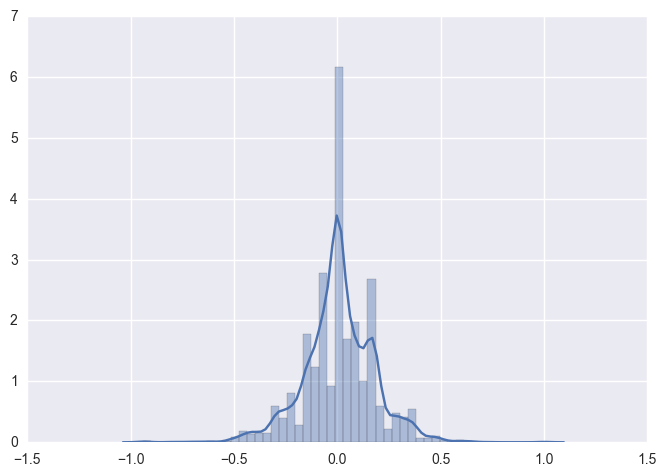

In [8]:
angles_sampled = pd.concat([angles_0_sampled, angles_1_sampled])
print(angles_sampled.shape)
sns.distplot(angles_sampled.steering.values)

In [9]:
file_list_center = angles_sampled[["center"]].values
angle_list_center = angles_sampled[["steering"]].values

file_list_left = angles_sampled[["left"]].values
angle_list_left = angle_list_center + 0.25

file_list_right = angles_sampled[["right"]].values
angle_list_right = angle_list_center - 0.25

file_list = np.concatenate((file_list_center, file_list_left, file_list_right))
angle_list = np.concatenate((angle_list_center, angle_list_left, angle_list_right))

file_list = np.squeeze(file_list)
angle_list = np.squeeze(angle_list)
print(file_list.shape, angle_list.shape)

(13641,) (13641,)


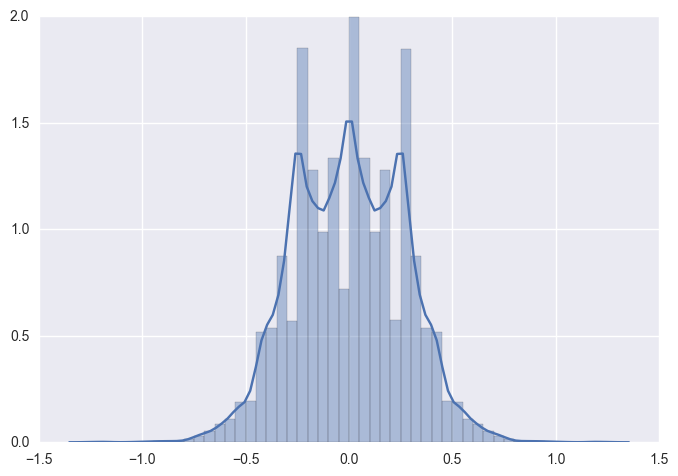

In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train = []
X_train_flip = [] 
angle_list_flip = -1 * angle_list
for filename in file_list:
    if(filename[0] == ' '):
        filename = filename[1:]
    imgBGR = cv2.imread(filename) 
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    imgRGB = imgRGB[60:130, 0:320]
    X_train.append(imgRGB)
    X_train_flip.append(np.fliplr(imgRGB))

X_train = np.concatenate((X_train, X_train_flip))
angle_list = np.concatenate((angle_list, angle_list_flip))

X_train, angle_list = shuffle(X_train, angle_list, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, angle_list, test_size=.2, random_state=0)
sns.distplot(angle_list)

In [11]:
X_train.shape
y_train.shape

(21825,)

In [12]:
np.save("./X_train", X_train)
np.save("./y_train", y_train)
np.save("./X_val", X_val)
np.save("./y_val", y_val)